In [1]:
import pandas as pd

In [2]:
beer_df = pd.read_csv('/Users/shoaib/Documents/ML/data/beer.csv')

In [3]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [4]:
## euclied distance calculation

In [5]:
####Distance between A and B = sqrtroot(square(AgeofA-AgeofB)+square(incomeofA - incomeofB))

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaled_beer_df = scaler.fit_transform(beer_df[['calories',
                                              'sodium',
                                              'alcohol',
                                              'cost']])

In [9]:
## to create segments, we first need to indentify kluster map

In [10]:
import seaborn as sn

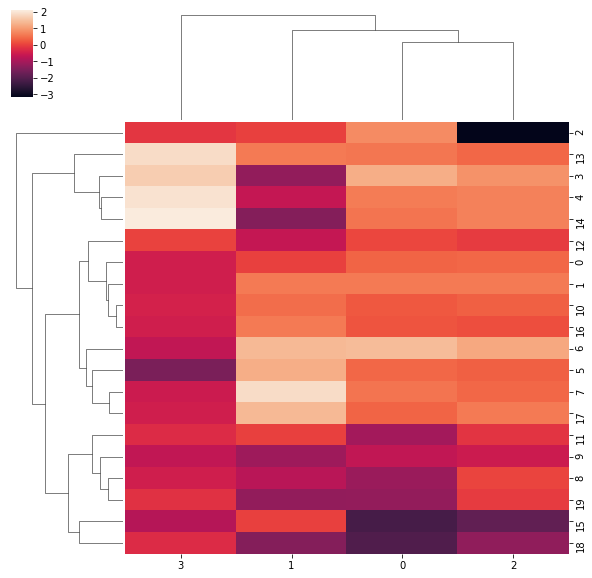

In [11]:
sn.clustermap(scaled_beer_df)

In [12]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(5)

In [15]:
kmeans.fit(scaled_beer_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
kmeans.labels_

array([1, 1, 4, 2, 2, 1, 1, 1, 3, 3, 1, 3, 3, 2, 2, 0, 1, 1, 0, 3],
      dtype=int32)

In [17]:
beer_df['label'] = kmeans.labels_

In [18]:
beer_df[beer_df.label==0]

,name,calories,sodium,alcohol,cost,label
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0


In [19]:
beer_df[beer_df.label==1]

,name,calories,sodium,alcohol,cost,label
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


In [20]:
beer_df[beer_df.label==2]

,name,calories,sodium,alcohol,cost,label
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


In [21]:
beer_df[beer_df.label==3]

,name,calories,sodium,alcohol,cost,label
8,Miller_Lite,99,10,4.3,0.43,3
9,Budweiser_Light,113,8,3.7,0.40,3
11,Coors_Light,102,15,4.1,0.46,3
12,Michelob_Light,135,11,4.2,0.50,3
19,Schlitz_Light,97,7,4.2,0.47,3


In [22]:
beer_df[beer_df.label==4]

,name,calories,sodium,alcohol,cost,label
2,Lowenbrau,157,15,0.9,0.48,4


In [23]:
beer_df[beer_df.label==3].mean()

name        (0.11146156215661365+0.3757035646347417j)
calories                                   (109.2+0j)
sodium                        (10.200000000000001+0j)
alcohol                       (4.1000000000000005+0j)
cost                         (0.45199999999999996+0j)
label                                          (3+0j)
dtype: complex128

In [24]:
beer_df[beer_df.label==3].std()

calories    15.690762
sodium       3.114482
alcohol      0.234521
cost         0.038341
label        0.000000
dtype: float64

In [25]:
beer_df.groupby('label').mean()

,calories,sodium,alcohol,cost
label,,,,
0,70.000,10.500,2.6000,0.4200
1,148.375,21.125,4.7875,0.4075
2,155.250,10.750,4.9750,0.7625
3,109.200,10.200,4.1000,0.4520
4,157.000,15.000,0.9000,0.4800


In [26]:
beer_df.groupby('label').std()

,calories,sodium,alcohol,cost
label,,,,
0,2.828427,6.363961,0.424264,0.056569
1,11.488348,3.979860,0.331393,0.052847
2,9.912114,5.909033,0.206155,0.025000
3,15.690762,3.114482,0.234521,0.038341
4,NaN,NaN,NaN,NaN
